### Experiments

#### Import Libraries

In [10]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader

#### Import Data

In [5]:

ETTm2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm2.csv")
ETTm1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm1.csv")
ETTh1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh1.csv")
ETTh2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh2.csv")

#### Global Parameters

In [12]:
p_lag = 96
future_steps = 96
batch_size = 8
epochs = 16
learning_rate=1.e-4
decomp_kernel_size = 24
one_layer = True
number_of_forecasts = 150

### 1 Layer

#### ETTm2

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 5.622650940799713
Current (running) training loss at iteration 10000 : 4.674999601507187
Current (running) training loss at iteration 15000 : 3.8796694882949194
Current (running) training loss at iteration 20000 : 3.497895229923725
Current (running) training loss at iteration 25000 : 3.282611427612305
Current (running) training loss at iteration 30000 : 3.9443907659431297

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.095129000666125.
Training MAE is 0.5097232054511925.
Training MSE is 4.129687593351875.
Training MAPE is 58032469.23860914.

Val metrics: -------
Running (validation) loss is 7.663534840095216.
Validation MAE is 0.25604410478084105.
Validation MSE is 2.5692289759250166.
Validation MAPE is 0.008618593327654056.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5

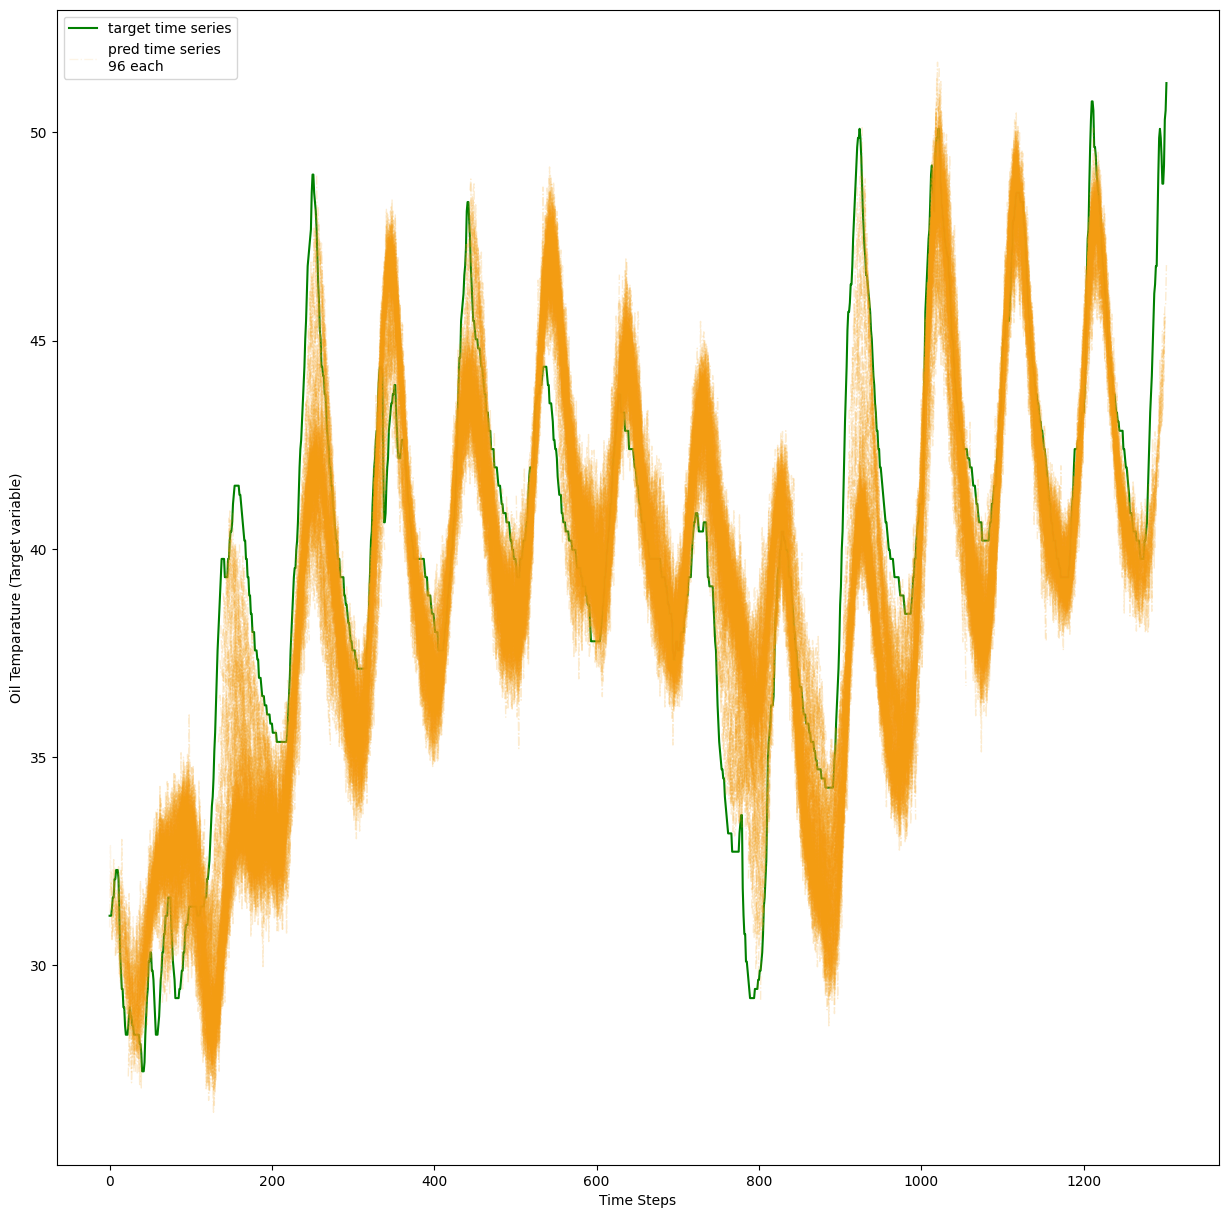

In [13]:
training_df, val_df, test_df = split_dataset(ETTm2)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            one_layer=one_layer
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### ETTm1

In [14]:
training_df, val_df, test_df = split_dataset(ETTm1)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps)
evaluate_on_test_data(test_data = test_data, neural_net = net)

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 4.755931371426582
Current (running) training loss at iteration 10000 : 3.2356916462063787
Current (running) training loss at iteration 15000 : 2.795571628956
Current (running) training loss at iteration 20000 : 2.442239564451575
Current (running) training loss at iteration 25000 : 2.2757308512425425
Current (running) training loss at iteration 30000 : 2.1577770179291567

Epoch 0: 

Train metrics: -------
Running (training) loss is 1.9791004218894876.
Training MAE is 0.35186087621736817.
Training MSE is 1.9839868302430523.
Training MAPE is 976781175.6836663.

Val metrics: -------
Running (validation) loss is 3.254864505694333.
Validation MAE is 0.16791273400023293.
Validation MSE is 1.0858738549238394.
Validation MAPE is 0.013620377730756068.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 

#### ETTh1

In [ ]:
training_df, val_df, test_df = split_dataset(ETTh1)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### ETTh2

In [ ]:
training_df, val_df, test_df = split_dataset(ETTh2)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps)
evaluate_on_test_data(test_data = test_data, neural_net = net)